In [2]:
#Reid Glaze
#Dr Gurari
#27 Sept 2022
#Lab Assignment 2

from tensorflow.keras.utils import to_categorical
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization

#import dataset - will only use the train portion to split into train, test, and validation
from keras.datasets import fashion_mnist
from keras import regularizers
import time
import numpy as np
from matplotlib import pyplot as plt
(X, y), (X_test, y_test) = fashion_mnist.load_data()

#train, test, validation split 70-15-15
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=123)


#Data pre-processing
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

Model: "sequential_99"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_151 (Conv2D)          (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_151 (MaxPoolin (None, 13, 13, 16)        0         
_________________________________________________________________
flatten_99 (Flatten)         (None, 2704)              0         
_________________________________________________________________
dense_198 (Dense)            (None, 80)                216400    
_________________________________________________________________
dense_199 (Dense)            (None, 10)                810       
Total params: 217,370
Trainable params: 217,370
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
420/420 [==============================] - 13s 30ms/step - loss: 1.2219 - accuracy: 0.7522 - val_loss: 

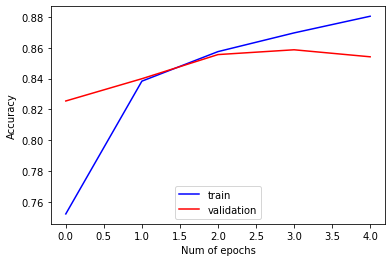

In [110]:
#1) one convolutional layer, no regularization


model = Sequential()
model.add(Conv2D(16, kernel_size = 3, activation = 'relu', input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(80, activation = 'relu'))
model.add(Dense(10, activation = "softmax"))
model.summary()

model.compile(loss = "categorical_crossentropy", optimizer = "SGD", metrics = ["accuracy"])

scores = []
histories = []
start = time.time()
history = model.fit(X_train, y_train, epochs = 5, batch_size = 100, validation_data= (X_val, y_val))
end = time.time()
num_mins = (end-start)/60
print("-------------------------------")
print("Total training time: "  + str(num_mins) + " minutes.")
score = model.evaluate(X_train, y_train, verbose = 0)
print("Training loss: %.4f" % score[0])
print("Training accuracy: %.2f" % (score[1] * 100.0))
print("-------------------------------")
score = model.evaluate(X_val, y_val, verbose = 0)
print("Validation loss: %.4f" % score[0])
print("Validation accuracy: %.2f" % (score[1] * 100.0))
print("-------------------------------")
scores.append(score[1])
histories.append(history)
plt.plot(histories[0].history["accuracy"], color = "blue", label = "train")
plt.plot(histories[0].history["val_accuracy"], color = "red", label = "validation")
plt.ylabel("Accuracy")
plt.xlabel("Num of epochs")
leg = plt.legend(loc='lower center')
plt.show()

Model: "sequential_84"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_132 (Conv2D)          (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_132 (MaxPoolin (None, 13, 13, 16)        0         
_________________________________________________________________
flatten_84 (Flatten)         (None, 2704)              0         
_________________________________________________________________
dense_168 (Dense)            (None, 80)                216400    
_________________________________________________________________
dense_169 (Dense)            (None, 10)                810       
Total params: 217,370
Trainable params: 217,370
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
420/420 [==============================] - 11s 26ms/step - loss: 7.7318 - accuracy: 0.3049 - val_loss: 

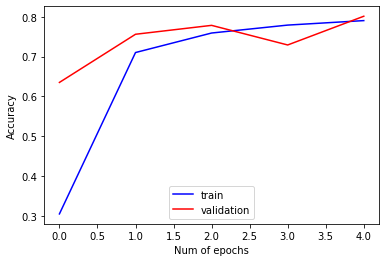

In [87]:
#2) one convolutional layer, use L2 kernel regularization

model = Sequential()
model.add(Conv2D(16, kernel_size = 3, activation = 'relu', input_shape = (28,28,1), kernel_regularizer = regularizers.l2(0.01)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(80, activation = 'relu'))
model.add(Dense(10, activation = "softmax"))
model.summary()

model.compile(loss = "categorical_crossentropy", optimizer = "SGD", metrics = ["accuracy"])

scores = []
histories = []
start = time.time()
history = model.fit(X_train, y_train, epochs = 5, batch_size = 100, validation_data= (X_val, y_val))
end = time.time()
num_mins = (end-start)/60
print("-------------------------------")
print("Total training time: "  + str(num_mins) + " minutes.")
score = model.evaluate(X_train, y_train, verbose = 0)
print("Training loss: %.4f" % score[0])
print("Training accuracy: %.2f" % (score[1] * 100.0))
print("-------------------------------")
score = model.evaluate(X_val, y_val, verbose = 0)
print("Validation loss: %.4f" % score[0])
print("Validation accuracy: %.2f" % (score[1] * 100.0))
print("-------------------------------")
scores.append(score[1])
histories.append(history)
plt.plot(histories[0].history["accuracy"], color = "blue", label = "train")
plt.plot(histories[0].history["val_accuracy"], color = "red", label = "validation")
plt.ylabel("Accuracy")
plt.xlabel("Num of epochs")
leg = plt.legend(loc='lower center')
plt.show()


Model: "sequential_86"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_134 (Conv2D)          (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_134 (MaxPoolin (None, 13, 13, 16)        0         
_________________________________________________________________
module_wrapper_39 (ModuleWra (None, 13, 13, 16)        0         
_________________________________________________________________
flatten_86 (Flatten)         (None, 2704)              0         
_________________________________________________________________
dense_172 (Dense)            (None, 80)                216400    
_________________________________________________________________
module_wrapper_40 (ModuleWra (None, 80)                0         
_________________________________________________________________
dense_173 (Dense)            (None, 10)              

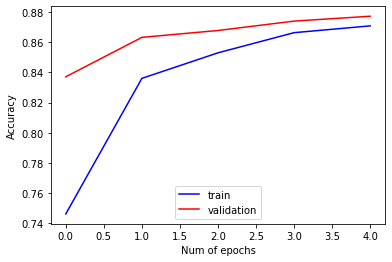

In [89]:
#3) one convolutional layer, use Droupout function

model = Sequential()
model.add(Conv2D(16, kernel_size = 3, activation = 'relu', input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(80, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation = "softmax"))
model.summary()

model.compile(loss = "categorical_crossentropy", optimizer = "SGD", metrics = ["accuracy"])

scores = []
histories = []
start = time.time()
history = model.fit(X_train, y_train, epochs = 5, batch_size = 100, validation_data= (X_val, y_val))
end = time.time()
num_mins = (end-start)/60
print("-------------------------------")
print("Total training time: "  + str(num_mins) + " minutes.")
score = model.evaluate(X_train, y_train, verbose = 0)
print("Training loss: %.4f" % score[0])
print("Training accuracy: %.2f" % (score[1] * 100.0))
print("-------------------------------")
score = model.evaluate(X_val, y_val, verbose = 0)
print("Validation loss: %.4f" % score[0])
print("Validation accuracy: %.2f" % (score[1] * 100.0))
print("-------------------------------")
scores.append(score[1])
histories.append(history)
plt.plot(histories[0].history["accuracy"], color = "blue", label = "train")
plt.plot(histories[0].history["val_accuracy"], color = "red", label = "validation")
plt.ylabel("Accuracy")
plt.xlabel("Num of epochs")
leg = plt.legend(loc='lower center')
plt.show()

Model: "sequential_92"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_144 (Conv2D)          (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_144 (MaxPoolin (None, 13, 13, 16)        0         
_________________________________________________________________
module_wrapper_49 (ModuleWra (None, 13, 13, 16)        64        
_________________________________________________________________
flatten_92 (Flatten)         (None, 2704)              0         
_________________________________________________________________
dense_184 (Dense)            (None, 80)                216400    
_________________________________________________________________
module_wrapper_50 (ModuleWra (None, 80)                320       
_________________________________________________________________
dense_185 (Dense)            (None, 10)              

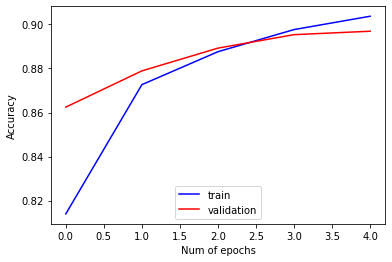

In [95]:
#4) one convolutional layer, batch normalization

model = Sequential()
model.add(Conv2D(16, kernel_size = 3, activation = 'relu', input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(80, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation = "softmax"))
model.summary()

model.compile(loss = "categorical_crossentropy", optimizer = "SGD", metrics = ["accuracy"])

scores = []
histories = []
start = time.time()
history = model.fit(X_train, y_train, epochs = 5, batch_size = 100, validation_data= (X_val, y_val))
end = time.time()
num_mins = (end-start)/60
print("-------------------------------")
print("Total training time: "  + str(num_mins) + " minutes.")
score = model.evaluate(X_train, y_train, verbose = 0)
print("Training loss: %.4f" % score[0])
print("Training accuracy: %.2f" % (score[1] * 100.0))
print("-------------------------------")
score = model.evaluate(X_val, y_val, verbose = 0)
print("Validation loss: %.4f" % score[0])
print("Validation accuracy: %.2f" % (score[1] * 100.0))
print("-------------------------------")
score = model.evaluate(X_val, y_val, verbose = 0)
scores.append(score[1])
histories.append(history)
plt.plot(histories[0].history["accuracy"], color = "blue", label = "train")
plt.plot(histories[0].history["val_accuracy"], color = "red", label = "validation")
plt.ylabel("Accuracy")
plt.xlabel("Num of epochs")
leg = plt.legend(loc='lower center')
plt.show()

Model: "sequential_88"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_136 (Conv2D)          (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_136 (MaxPoolin (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_137 (Conv2D)          (None, 11, 11, 16)        2320      
_________________________________________________________________
max_pooling2d_137 (MaxPoolin (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_88 (Flatten)         (None, 400)               0         
_________________________________________________________________
dense_176 (Dense)            (None, 80)                32080     
_________________________________________________________________
dense_177 (Dense)            (None, 10)              

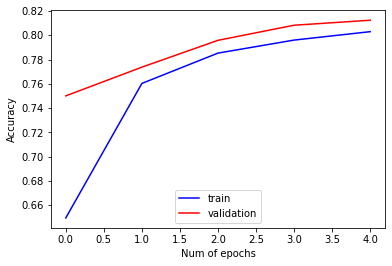

In [91]:
#5) two convolutional layers, no regularization


model = Sequential()
model.add(Conv2D(16, kernel_size = 3, activation = 'relu', input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16, kernel_size = 3, activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(80, activation = 'relu'))
model.add(Dense(10, activation = "softmax"))
model.summary()

model.compile(loss = "categorical_crossentropy", optimizer = "SGD", metrics = ["accuracy"])

scores = []
histories = []
start = time.time()
history = model.fit(X_train, y_train, epochs = 5, batch_size = 100, validation_data= (X_val, y_val))
end = time.time()
num_mins = (end-start)/60
print("-------------------------------")
print("Total training time: "  + str(num_mins) + " minutes.")
score = model.evaluate(X_train, y_train, verbose = 0)
print("Training loss: %.4f" % score[0])
print("Training accuracy: %.2f" % (score[1] * 100.0))
print("-------------------------------")
score = model.evaluate(X_val, y_val, verbose = 0)
print("Validation loss: %.4f" % score[0])
print("Validation accuracy: %.2f" % (score[1] * 100.0))
print("-------------------------------")
score = model.evaluate(X_val, y_val, verbose = 0)
scores.append(score[1])
histories.append(history)
plt.plot(histories[0].history["accuracy"], color = "blue", label = "train")
plt.plot(histories[0].history["val_accuracy"], color = "red", label = "validation")
plt.ylabel("Accuracy")
plt.xlabel("Num of epochs")
leg = plt.legend(loc='lower center')
plt.show()

Model: "sequential_89"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_138 (Conv2D)          (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_138 (MaxPoolin (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_139 (Conv2D)          (None, 11, 11, 16)        2320      
_________________________________________________________________
max_pooling2d_139 (MaxPoolin (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_89 (Flatten)         (None, 400)               0         
_________________________________________________________________
dense_178 (Dense)            (None, 80)                32080     
_________________________________________________________________
dense_179 (Dense)            (None, 10)              

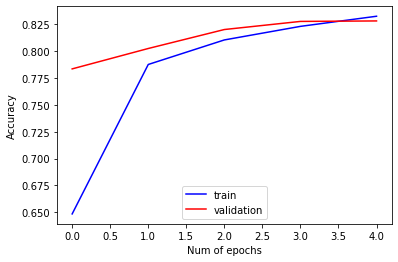

In [92]:
#6) two convolutional layers using kernel regularization

model = Sequential()
model.add(Conv2D(16, kernel_size = 3, activation = 'relu', input_shape = (28,28,1), kernel_regularizer = regularizers.l2(0.01)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16, kernel_size = 3, activation = 'relu', kernel_regularizer = regularizers.l2(0.01)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(80, activation = 'relu'))
model.add(Dense(10, activation = "softmax"))
model.summary()

model.compile(loss = "categorical_crossentropy", optimizer = "SGD", metrics = ["accuracy"])

scores = []
histories = []
start = time.time()
history = model.fit(X_train, y_train, epochs = 5, batch_size = 100, validation_data= (X_val, y_val))
end = time.time()
num_mins = (end-start)/60
print("-------------------------------")
print("Total training time: "  + str(num_mins) + " minutes.")
score = model.evaluate(X_train, y_train, verbose = 0)
print("Training loss: %.4f" % score[0])
print("Training accuracy: %.2f" % (score[1] * 100.0))
print("-------------------------------")
score = model.evaluate(X_val, y_val, verbose = 0)
print("Validation loss: %.4f" % score[0])
print("Validation accuracy: %.2f" % (score[1] * 100.0))
print("-------------------------------")
scores.append(score[1])
histories.append(history)
plt.plot(histories[0].history["accuracy"], color = "blue", label = "train")
plt.plot(histories[0].history["val_accuracy"], color = "red", label = "validation")
plt.ylabel("Accuracy")
plt.xlabel("Num of epochs")
leg = plt.legend(loc='lower center')
plt.show()



Model: "sequential_90"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_140 (Conv2D)          (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_140 (MaxPoolin (None, 13, 13, 16)        0         
_________________________________________________________________
module_wrapper_43 (ModuleWra (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_141 (Conv2D)          (None, 11, 11, 16)        2320      
_________________________________________________________________
max_pooling2d_141 (MaxPoolin (None, 5, 5, 16)          0         
_________________________________________________________________
module_wrapper_44 (ModuleWra (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_90 (Flatten)         (None, 400)             

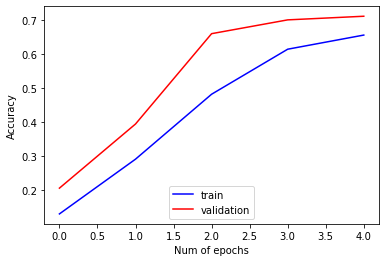

In [93]:
#7) two convolutional layers using dropout

model = Sequential()
model.add(Conv2D(16, kernel_size = 3, activation = 'relu', input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))
model.add(Conv2D(16, kernel_size = 3, activation = 'relu', input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(80, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation = "softmax"))
model.summary()

model.compile(loss = "categorical_crossentropy", optimizer = "SGD", metrics = ["accuracy"])

scores = []
histories = []
start = time.time()
history = model.fit(X_train, y_train, epochs = 5, batch_size = 100, validation_data= (X_val, y_val))
end = time.time()
num_mins = (end-start)/60
print("-------------------------------")
print("Total training time: "  + str(num_mins) + " minutes.")
score = model.evaluate(X_train, y_train, verbose = 0)
print("Training loss: %.4f" % score[0])
print("Training accuracy: %.2f" % (score[1] * 100.0))
print("-------------------------------")
score = model.evaluate(X_val, y_val, verbose = 0)
print("Validation loss: %.4f" % score[0])
print("Validation accuracy: %.2f" % (score[1] * 100.0))
print("-------------------------------")
scores.append(score[1])
histories.append(history)
plt.plot(histories[0].history["accuracy"], color = "blue", label = "train")
plt.plot(histories[0].history["val_accuracy"], color = "red", label = "validation")
plt.ylabel("Accuracy")
plt.xlabel("Num of epochs")
leg = plt.legend(loc='lower center')
plt.show()

Model: "sequential_91"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_142 (Conv2D)          (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_142 (MaxPoolin (None, 13, 13, 16)        0         
_________________________________________________________________
module_wrapper_46 (ModuleWra (None, 13, 13, 16)        64        
_________________________________________________________________
conv2d_143 (Conv2D)          (None, 11, 11, 16)        2320      
_________________________________________________________________
max_pooling2d_143 (MaxPoolin (None, 5, 5, 16)          0         
_________________________________________________________________
module_wrapper_47 (ModuleWra (None, 5, 5, 16)          64        
_________________________________________________________________
flatten_91 (Flatten)         (None, 400)             

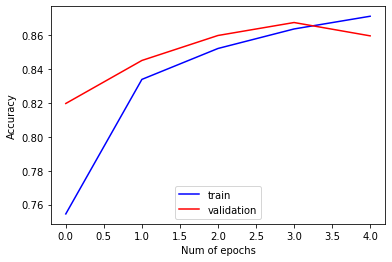

In [94]:
#8) two convolutional layer, batch normalization

model = Sequential()
model.add(Conv2D(16, kernel_size = 3, activation = 'relu', input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(16, kernel_size = 3, activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(80, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation = "softmax"))
model.summary()

model.compile(loss = "categorical_crossentropy", optimizer = "SGD", metrics = ["accuracy"])

scores = []
histories = []
start = time.time()
history = model.fit(X_train, y_train, epochs = 5, batch_size = 100, validation_data= (X_val, y_val))
end = time.time()
num_mins = (end-start)/60
print("-------------------------------")
print("Total training time: "  + str(num_mins) + " minutes.")
score = model.evaluate(X_train, y_train, verbose = 0)
print("Training loss: %.4f" % score[0])
print("Training accuracy: %.2f" % (score[1] * 100.0))
print("-------------------------------")
score = model.evaluate(X_val, y_val, verbose = 0)
print("Validation loss: %.4f" % score[0])
print("Validation accuracy: %.2f" % (score[1] * 100.0))
print("-------------------------------")
scores.append(score[1])
histories.append(history)
plt.plot(histories[0].history["accuracy"], color = "blue", label = "train")
plt.plot(histories[0].history["val_accuracy"], color = "red", label = "validation")
plt.ylabel("Accuracy")
plt.xlabel("Num of epochs")
leg = plt.legend(loc='lower center')
plt.show()

In [10]:
#Train best model with train & validation data and measure accuracy using test data. 
#combine train and validation data
train_data = list(X_train)
train_labels = list(y_train)
val_data = list(X_val)
val_labels = list(y_val)
all_data = train_data+val_data
all_labels = train_labels+val_labels
new_X_train = np.array(all_data)
new_y_train = np.array(all_labels)

model = Sequential()
model.add(Conv2D(16, kernel_size = 3, activation = 'relu', input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(80, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation = "softmax"))
model.summary()

model.compile(loss = "categorical_crossentropy", optimizer = "SGD", metrics = ["accuracy"])

scores = []
histories = []
start = time.time()
history = model.fit(new_X_train, new_y_train, epochs = 5, batch_size = 100)
end = time.time()
num_mins = (end-start)/60
print("-------------------------------")
print("Total training time: "  + str(num_mins) + " minutes.")
score = model.evaluate(X_test, y_test, verbose = 0)
print("Test accuracy: %.2f" % (score[1] * 100.0))
print("-------------------------------")



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
module_wrapper_4 (ModuleWrap (None, 13, 13, 16)        64        
_________________________________________________________________
flatten_2 (Flatten)          (None, 2704)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 80)                216400    
_________________________________________________________________
module_wrapper_5 (ModuleWrap (None, 80)                320       
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [14]:
import tensorflow as tf
import glob
import numpy as np
import pickle
import os

from matplotlib import pyplot as plt
from PIL import Image
from urllib import request
from io import BytesIO

from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16

In [61]:
layer = model.layers[0]
filters, bias = layer.get_weights()
print(layer.name, filters.shape)

f_min, f_max = filters.min(), filters.max()
filters = (filters-f_min) / (f_max - f_min)

n_filters = 16; ix = 1
for i in range(n_filters):
    f = filters[:, :, :, i]
  

    ax = plt.subplot(n_filters, 1, ix)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(f[:, :], cmap = "gray")
    ix +=1

plt.show()



conv2d_3 (3, 3, 1, 16)


In [48]:
model = Sequential()
model.add(Conv2D(16, kernel_size = 3, activation = 'relu', input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(16, kernel_size = 3, activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(80, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation = "softmax"))
model.summary()

model.compile(loss = "categorical_crossentropy", optimizer = "SGD", metrics = ["accuracy"])

scores = []
histories = []
start = time.time()
history = model.fit(new_X_train, new_y_train, epochs = 5, batch_size = 100)
end = time.time()
num_mins = (end-start)/60
print("-------------------------------")
print("Total training time: "  + str(num_mins) + " minutes.")
score = model.evaluate(X_test, y_test, verbose = 0)
print("Test accuracy: %.2f" % (score[1] * 100.0))
print("-------------------------------")



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
module_wrapper_6 (ModuleWrap (None, 13, 13, 16)        64        
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 16)        2320      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
module_wrapper_7 (ModuleWrap (None, 5, 5, 16)          64        
_________________________________________________________________
flatten_3 (Flatten)          (None, 400)              

conv2d_3 (3, 3, 1, 16)


conv2d_4 (3, 3, 16, 16)


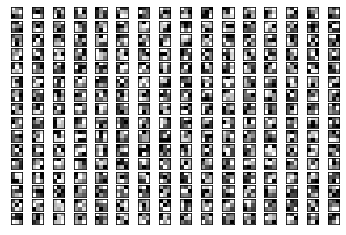

In [72]:
layer = model.layers[0]
filters, bias = layer.get_weights()
print(layer.name, filters.shape)


n_filters = 16; ix = 1
for i in range(n_filters):
    f = filters[:, :, :, i]
  

    ax = plt.subplot(n_filters, 1, ix)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(f[:, :], cmap = "gray")
    ix +=1

plt.show()

layer = model.layers[0]
filters, bias = layer.get_weights()


layer = model.layers[3]
filters, bias = layer.get_weights()
print(layer.name, filters.shape)

n_filters = 16; ix = 1
for i in range(n_filters):
    f = filters[:, :, :, i]
  
  #plot each channel
    for j in range(16):
            ax = plt.subplot(n_filters, 16, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            plt.imshow(f[:, :, j], cmap = "gray")
            ix +=1

plt.show()

